Introduction: There is a strength of unity - and that unity forms the basics of ensemble learning methods that combine multiple learners to produce a more powerful model. The idea of bagging is then simple: we want to fit several independent models and “average” their predictions in order to obtain a model with a lower variance. 

In this blog, we will explore the concept of bagging, which is an ensemble learning technique, using the powerful Scikit-learn library. Additionally, we will implement a custom bagging approach for comparison purposes. We will analyze and compare the performance of both methods.

To better understand the results and gain insights into how individual decision trees contribute to the ensemble, we will visualize the decision surfaces of each decision tree used in the bagging process.


Some imports

In [204]:
# Numerical analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import seaborn as sns


# Data allocation and Splitting
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

# Statistical Functions
from scipy.stats import mode

#Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#Model Evaluation and Metrics
from sklearn.metrics import accuracy_score




Function for train and evaluate sklearn decision tree 

In [205]:
def train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test):
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision Accuracy:", accuracy)
    return accuracy, decision_tree

Function for plot decision regions of decision tree.

In [206]:


def plot_decision_regions_for_classifier(X_test, y_test, classifier):
    plot_decision_regions(X_test, y_test, clf=classifier, legend=2)
    plt.show()

Function for sklearn bagging classifier.

In [207]:
def sklearn_train_and_evaluate_bagging_classifier(X_train, X_test, y_train, y_test, num_estimators=10):
    base_decision_tree = DecisionTreeClassifier(random_state=42)
    bagging_model = BaggingClassifier(base_estimator=base_decision_tree, n_estimators=num_estimators, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Bagging Model Accuracy:", accuracy)
    return accuracy, bagging_model

Function for custom bagging classifier.

In [208]:
def defined_train_and_evaluate_bagging_ensemble(num_of_decision_trees, X_train, X_test, y_train, y_test):
    decision_trees = []
    for _ in range(num_of_decision_trees):
        index = np.random.choice(len(X_train), len(X_train), replace=True)
        X_sample = X_train[index]
        y_sample = y_train[index]
        base_model = DecisionTreeClassifier(random_state=42)
        base_model.fit(X_sample, y_sample)
        decision_trees.append(base_model)

    predictions = []
    for tree in decision_trees:
        prediction = tree.predict(X_test)
        predictions.append(prediction)

    final_pred = mode(predictions, axis=0)[0]
    accuracy = accuracy_score(y_test, final_pred)
    print("Bagging Accuracy:", accuracy)
    return accuracy, decision_trees

Function for train and evaluate sklearn Random forest.

In [209]:
def train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, num_estimators):
    random_forest = RandomForestClassifier(n_estimators=num_estimators, random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Accuracy:", accuracy)
    return accuracy, random_forest


Function for train and test data

In [210]:
def plot_train_test_data(X_train, X_test, y_train):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=150, alpha=0.4, cmap='viridis', label='Training data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=20, alpha=1.0, label='Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

Function for visualizing decision trees used in bagging.

In [211]:
def plot_decision_trees_bagging(decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_tree(tree, filled=True, feature_names=['F1', 'F2'], class_names=['C0', 'C1'])
        plt.title('DT {}'.format(i+1))

Function for visualizing decision region of classifier used in bagging. 

In [212]:
def plot_decision_regions_individual_trees(X_test, y_test, decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_decision_regions(X=X_test, y=y_test, clf=tree, legend=2)
        plt.title('Decision Tree {}'.format(i+1))
    plt.show()

Function for visualizing different estimators used in random forest.

In [213]:
def plot_decision_estimators_random_forest(rf1):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(rf1.estimators_):
        plt.subplot(5, 5, i + 1)
        plot_tree(tree, filled=True)
        plt.title('DT {}'.format(i + 1))
    plt.show()

Function for visualizing different decision regions when more than two class value.

In [214]:
def plot_individual_tree_sklearn_bagging(decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_tree(tree, filled=True, feature_names=['F0', 'F1'], class_names=['C0', 'C1', 'C2', 'C3'])
        plt.title('Decision Tree {}'.format(i+1))
    plt.show()

## Implementation on make_moon dataset

make_moons is classification dataset where class value is bainary and we add some noise and genarate random samples.

In [215]:
X, y = make_moons(n_samples=1000, noise=0.3 , random_state=42 )

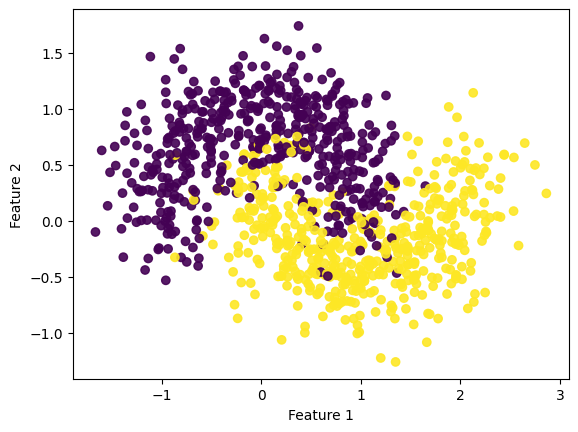

In [216]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

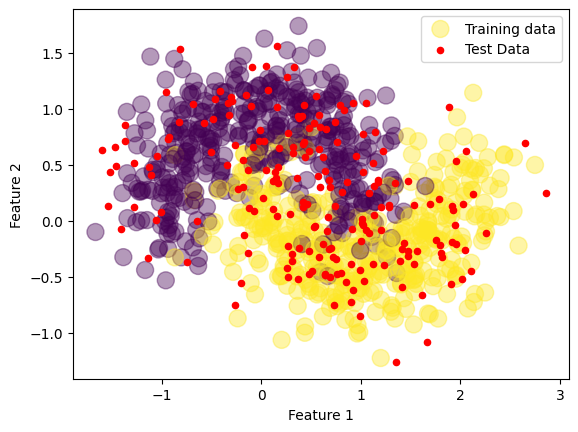

In [218]:
plot_train_test_data(X_train, X_test, y_train)

In [219]:
acc3, dt2 = train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test)


Decision Accuracy: 0.91


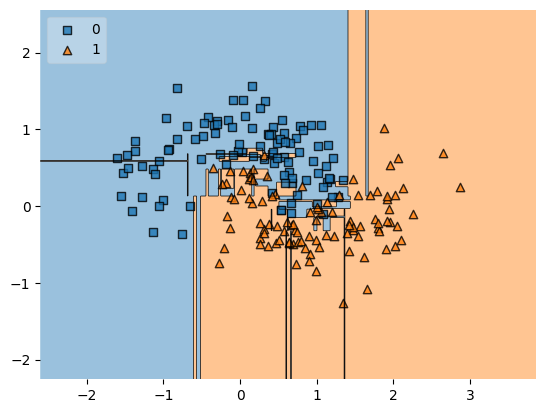

In [220]:
plot_decision_regions_for_classifier(X_test,y_test,dt2)

[Help: github](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

[Help : Stackoverflow](https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a)

Plot  indivisual decision tree of bagging

In [221]:
acc_bag1, bag_dt1= sklearn_train_and_evaluate_bagging_classifier(X_train, X_test, y_train, y_test)

Bagging Model Accuracy: 0.895


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [222]:
acc3,dt3=defined_train_and_evaluate_bagging_ensemble(10,X_train,X_test,y_train,y_test)

Bagging Accuracy: 0.91


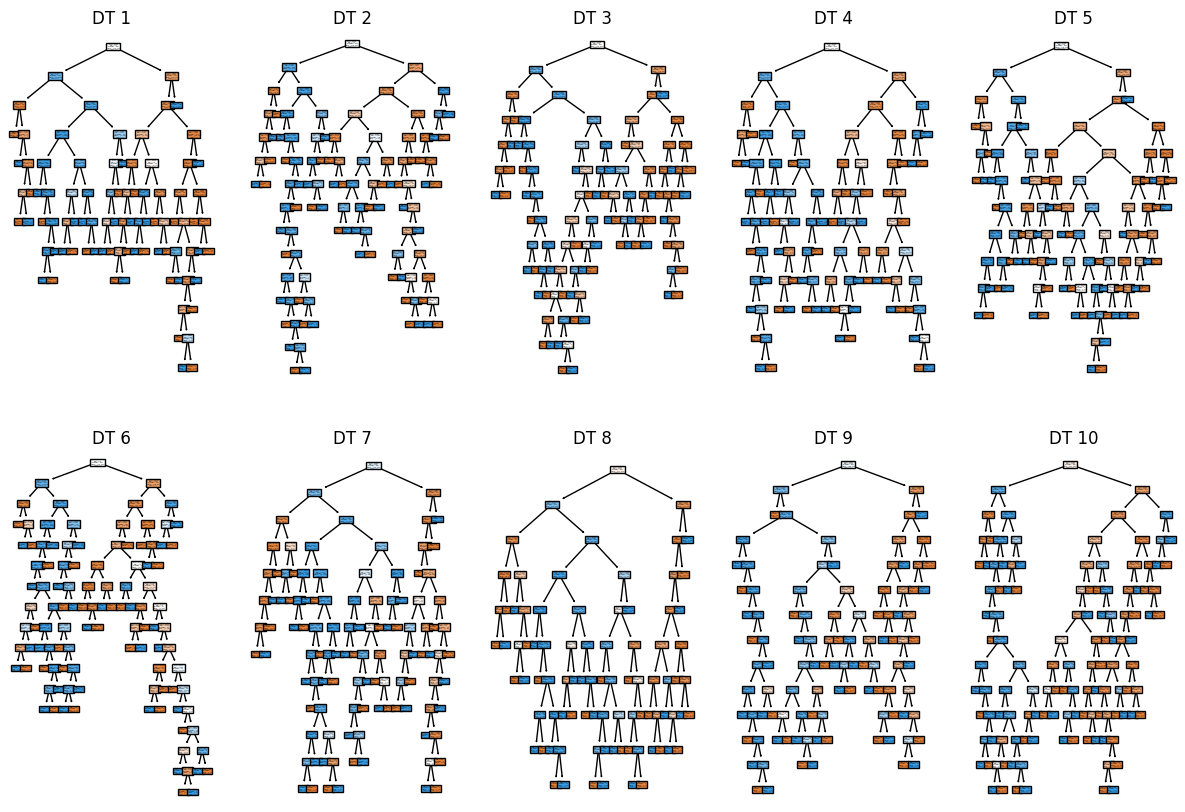

In [223]:
plot_decision_trees_bagging(dt3)

Visualize the decision surface of each decision tree of bagging

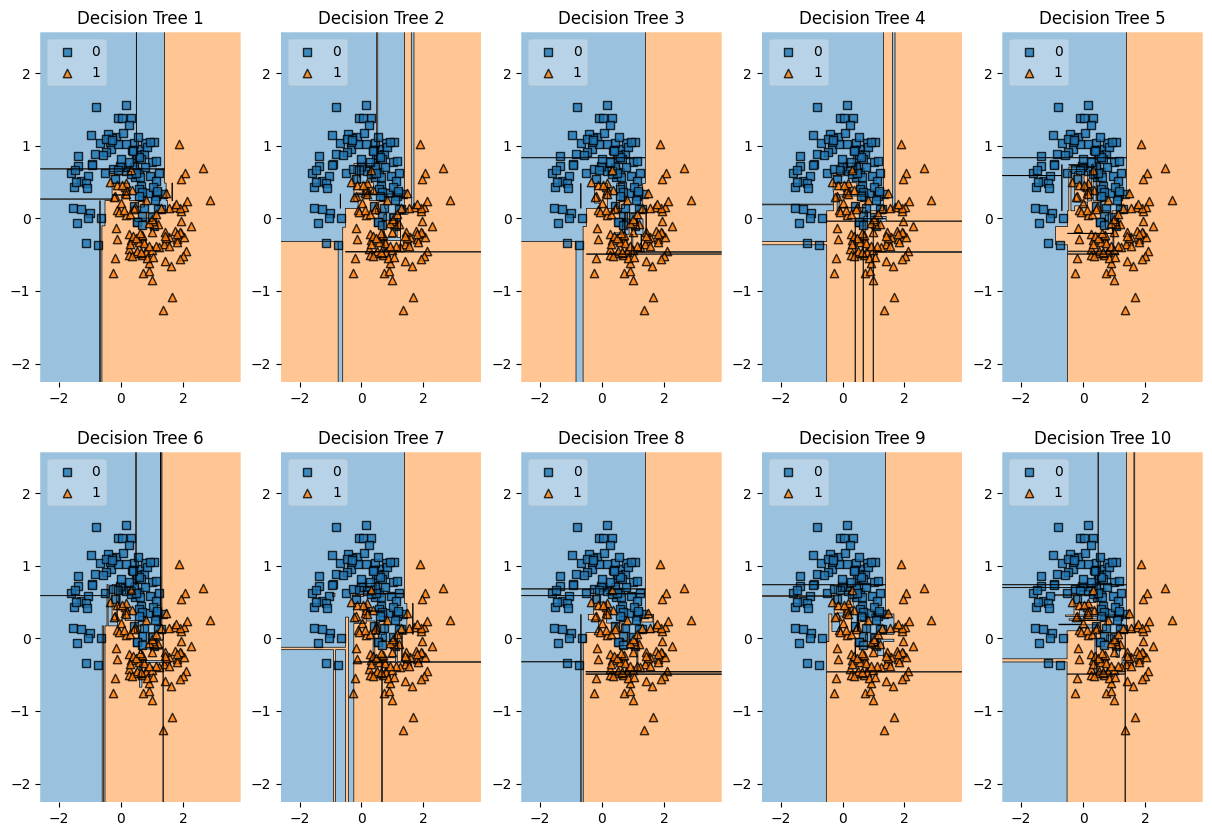

In [224]:
plot_decision_regions_individual_trees(X_test, y_test, dt3)


The decision tree model achieved an accuracy of 0.91 on the test data. This model is relatively simple and prone to overfitting. The bagging ensemble, implemented either through the Scikit-learn BaggingClassifier or a custom bagging approach, performed better than the individual decision tree. By combining multiple decision trees trained on bootstrapped subsets of the data, the bagging model achieved an accuracy of 0.91. The ensemble approach helped reduce overfitting and improved the model's overall accuracy. The Random Forest model, which is a specific type of bagging ensemble, achieved the highest accuracy of 0.91 among the three models.

## Implementation on make_classification dataset

In [225]:
X, y = make_classification(
    n_samples=100,
    n_features=2,        
    n_redundant=0,        
    n_classes=4,          
    n_clusters_per_class=1,  
    flip_y=0.1,          
    random_state=42
)

/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


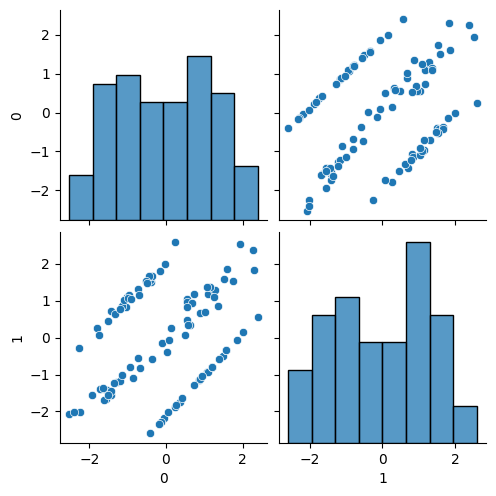

In [226]:
df = pd.DataFrame(X)
sns.pairplot(df);

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

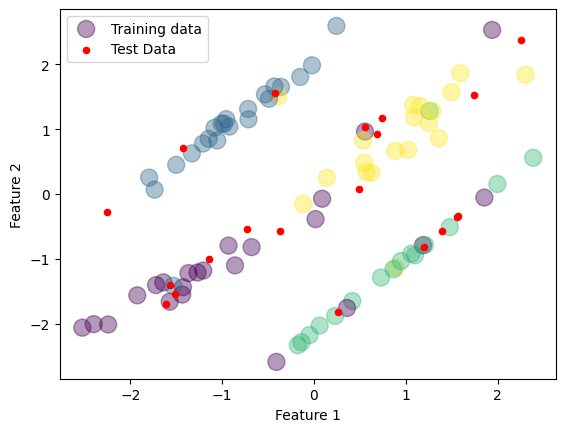

In [228]:
plot_train_test_data(X_train,X_test,y_train)


In [229]:
acc4,dt4 = train_and_evaluate_decision_tree(X_train,X_test,y_train,y_test)

Decision Accuracy: 0.45


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


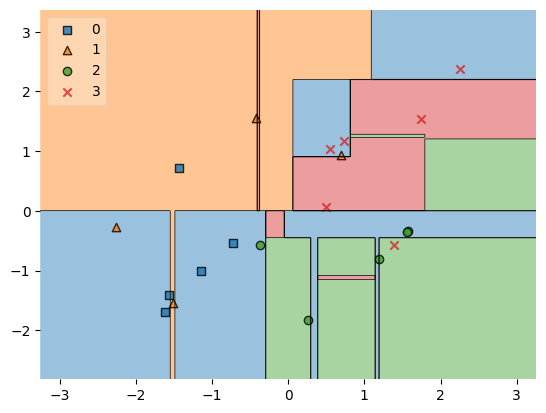

In [230]:
plot_decision_regions_for_classifier(X_test,y_test,dt4)

In [231]:
acc_bag2, bag_dt2= defined_train_and_evaluate_bagging_ensemble(10,X_train, X_test, y_train, y_test)

Bagging Accuracy: 0.55


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/rishabh.mondal/mini

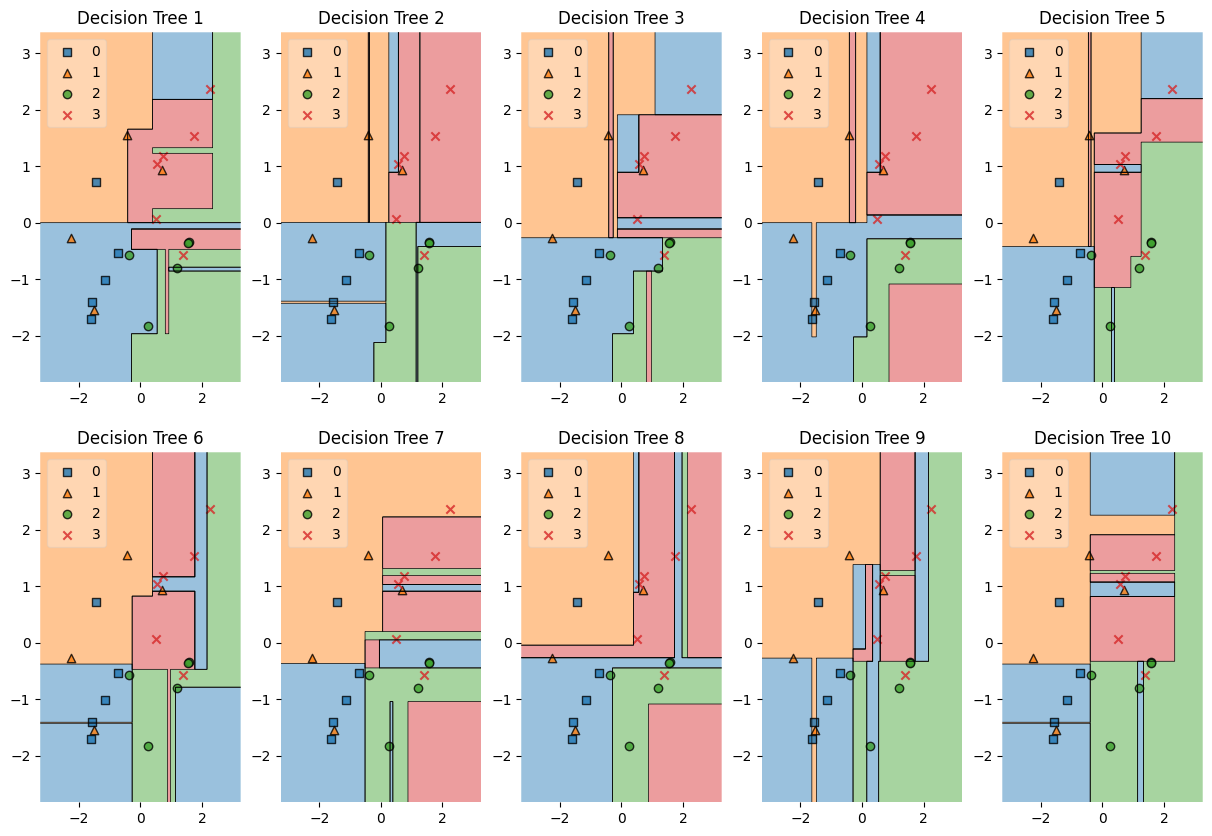

In [232]:
plot_decision_regions_individual_trees(X_test, y_test, bag_dt2)


In [233]:
acc5,dt5=sklearn_train_and_evaluate_bagging_classifier(X_train,X_test,y_train,y_test)

Bagging Model Accuracy: 0.55


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


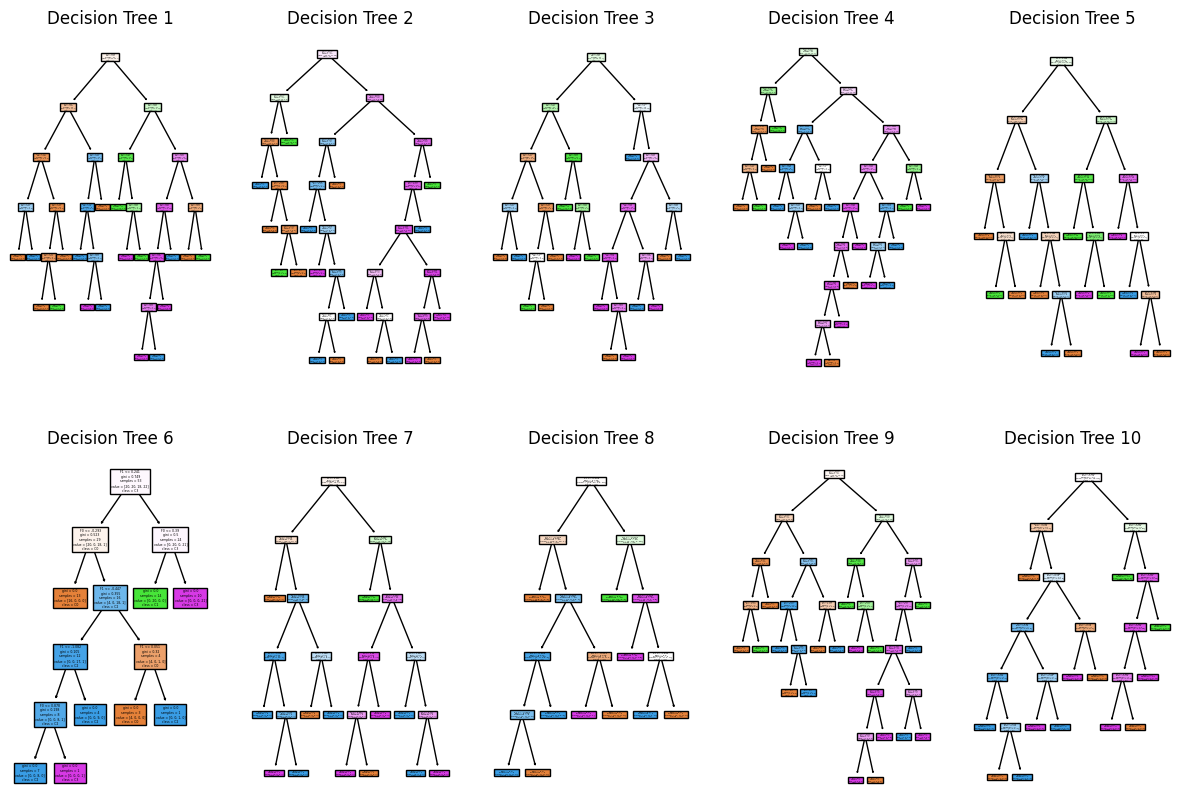

In [234]:
plot_individual_tree_sklearn_bagging(dt5)

In [235]:
rf_acc,rf1 = train_and_evaluate_random_forest(X_train, X_test, y_train, y_test,25)

Random Forest Accuracy: 0.6


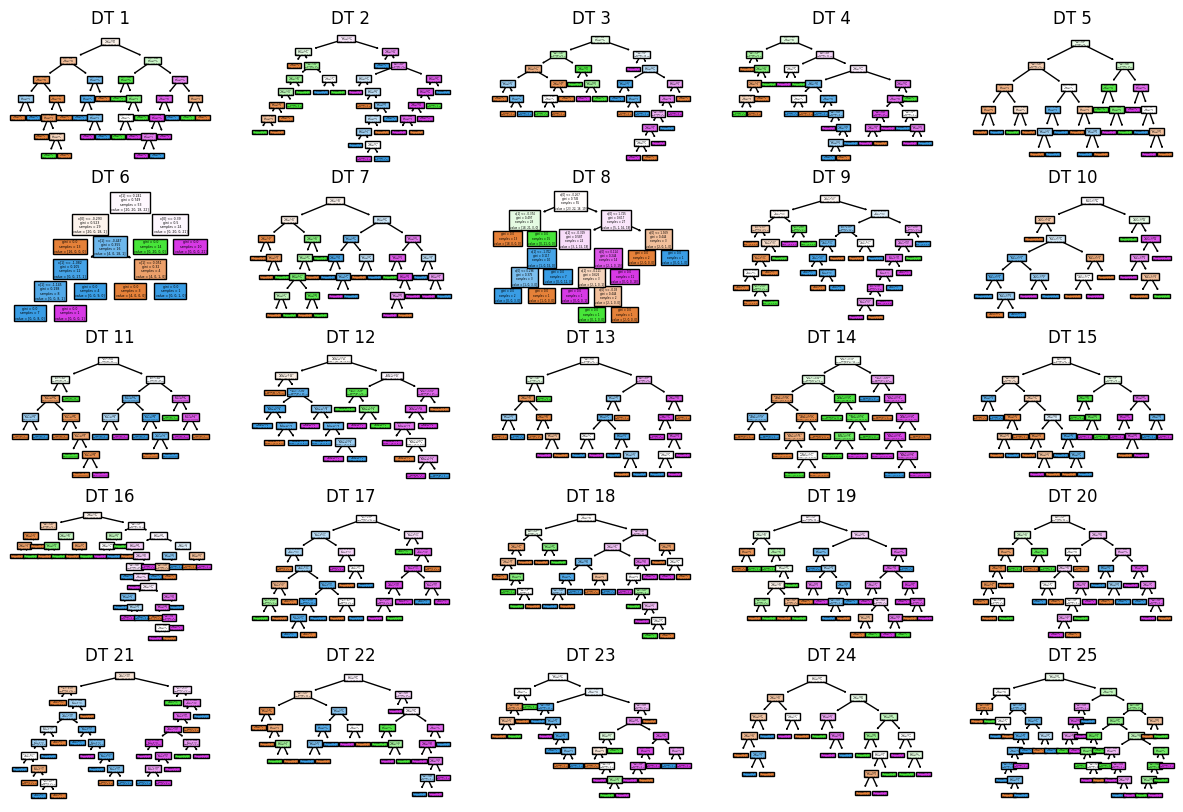

In [236]:
plot_decision_estimators_random_forest(rf1)

The decision tree model achieved an accuracy of 0.45 on the test data. This model is relatively simple and prone to overfitting. The bagging ensemble, implemented either through the Scikit-learn BaggingClassifier or a custom bagging approach, performed better than the individual decision tree. By combining multiple decision trees trained on bootstrapped subsets of the data, the bagging model achieved an accuracy of 0.55. The ensemble approach helped reduce overfitting and improved the model's overall accuracy. The Random Forest model, which is a specific type of bagging ensemble, achieved the highest accuracy of 0.6 among the three models.

## Gradient Decent

In [237]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(X.shape, y.shape)


(1000, 2) (1000,)


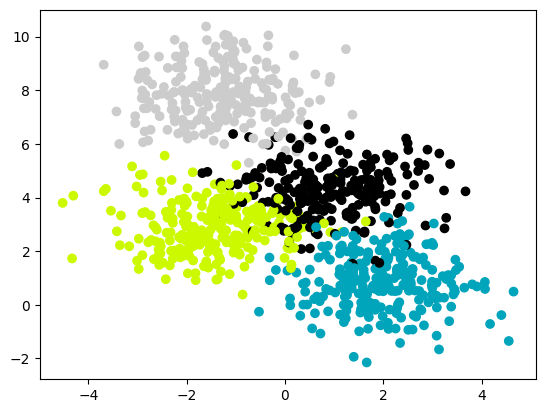

In [238]:

plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

In [239]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y.shape)

(800, 2) (200, 2) (1000,)


In [240]:
import torch
X_train, y_train, X_test, y_test = map(torch.tensor, (X_train, Y_train, X_test,y_test ))


In [241]:
print(X_train.shape, Y_train.shape)

     

torch.Size([800, 2]) (800,)


In [242]:
a = torch.rand([2, 4])
print(a)
print(a.exp())
print(a.exp().sum())
print(a.exp().sum(0))
print(a.exp().sum(-1))
print(a.exp().sum(-1).unsqueeze(-1))

tensor([[0.6089, 0.9420, 0.6135, 0.5624],
        [0.4536, 0.3743, 0.6434, 0.2454]])
tensor([[1.8384, 2.5652, 1.8468, 1.7548],
        [1.5740, 1.4539, 1.9029, 1.2782]])
tensor(14.2143)
tensor([3.4124, 4.0191, 3.7498, 3.0330])
tensor([8.0053, 6.2090])
tensor([[8.0053],
        [6.2090]])


In [243]:

def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4) #softmax
  return h2

In [244]:
import math
weights1 = torch.randn(2, 2) 
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) 
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

In [245]:
y = torch.tensor([1, 0])
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])

def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [246]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [247]:
learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []
X_train = X_train.float()
Y_train = Y_train.long()

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()


AttributeError: 'numpy.ndarray' object has no attribute 'long'

In [ ]:
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])